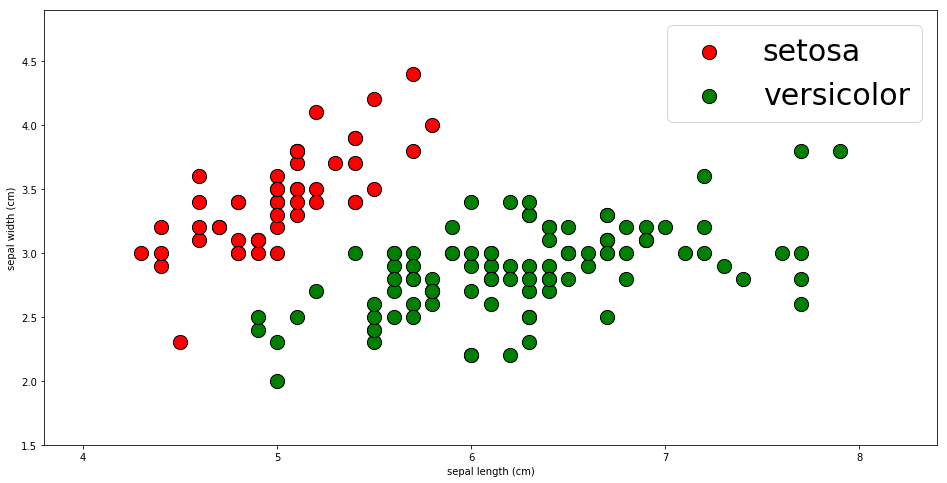

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

# Đọc dữ liệu iris
iris = datasets.load_iris()

# Lấy 2 đặc trưng đầu tiên (trong số 4 đặc trưng)
X = iris.data[:, :2]  

# Lấy nhãn của các mẫu
y = iris.target
y = 0*(y==0) + 1 * (y!=0)

# Lấy giá trị min, max của các đặc trưng để vẽ hình
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Lấy ra hệ tọa độ để vẽ
fig, ax = plt.subplots(figsize=(16, 8))

# Màu sắc của từng lớp đối tượng
color = ['red', 'green', 'blue']

# Vẽ từng lớp trong dữ liệu
for classIndex in set(y):
    # Lọc ra các mẫu thuộc vào lớp classIndex
    mask = y==classIndex
    # Lấy tên của lớp
    name = iris.target_names[classIndex]
    # Vẽ các mẫu thuộc lớp classIndex
    ax.scatter(X[mask,0], X[mask,1], c=color[classIndex], label=name, edgecolor='k', s = 200)

# đặt các thông số của đồ thị
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
#ax.set_xticks(())
#ax.set_yticks(())
ax.legend(fontsize=30)

# Đưa ra màn hình
plt.show()

iter 0 likelihood 93.9798834588
iter 1 likelihood 103.304019606
iter 2 likelihood 101.620685729
iter 3 likelihood 102.529649283
iter 4 likelihood 102.706449741
iter 5 likelihood 103.078751651
iter 6 likelihood 103.39174294
iter 7 likelihood 103.714737591
iter 8 likelihood 104.029351511
iter 9 likelihood 104.340474031
iter 10 likelihood 104.646929667
iter 11 likelihood 104.949094134
iter 12 likelihood 105.246954207
iter 13 likelihood 105.540592389
iter 14 likelihood 105.830068035
iter 15 likelihood 106.115445789
iter 16 likelihood 106.396788794
iter 17 likelihood 106.674160165
iter 18 likelihood 106.947622573
iter 19 likelihood 107.217238264
iter 20 likelihood 107.483068989
iter 21 likelihood 107.745175956
iter 22 likelihood 108.00361979
iter 23 likelihood 108.258460492
iter 24 likelihood 108.509757406
iter 25 likelihood 108.75756919
iter 26 likelihood 109.001953787
iter 27 likelihood 109.242968405
iter 28 likelihood 109.480669498
iter 29 likelihood 109.715112745
iter 30 likelihood 109.

iter 444 likelihood 132.597016803
iter 445 likelihood 132.608036484
iter 446 likelihood 132.619006954
iter 447 likelihood 132.629928494
iter 448 likelihood 132.640801381
iter 449 likelihood 132.65162589
iter 450 likelihood 132.662402295
iter 451 likelihood 132.673130869
iter 452 likelihood 132.68381188
iter 453 likelihood 132.694445596
iter 454 likelihood 132.705032283
iter 455 likelihood 132.715572205
iter 456 likelihood 132.726065624
iter 457 likelihood 132.7365128
iter 458 likelihood 132.74691399
iter 459 likelihood 132.757269453
iter 460 likelihood 132.767579441
iter 461 likelihood 132.777844207
iter 462 likelihood 132.788064003
iter 463 likelihood 132.798239077
iter 464 likelihood 132.808369678
iter 465 likelihood 132.818456049
iter 466 likelihood 132.828498435
iter 467 likelihood 132.838497079
iter 468 likelihood 132.84845222
iter 469 likelihood 132.858364097
iter 470 likelihood 132.868232948
iter 471 likelihood 132.878059007
iter 472 likelihood 132.887842508
iter 473 likelihood 

iter 799 likelihood 134.673139509
iter 800 likelihood 134.67595366
iter 801 likelihood 134.678758144
iter 802 likelihood 134.681552998
iter 803 likelihood 134.684338259
iter 804 likelihood 134.687113964
iter 805 likelihood 134.689880149
iter 806 likelihood 134.692636851
iter 807 likelihood 134.695384106
iter 808 likelihood 134.698121951
iter 809 likelihood 134.700850421
iter 810 likelihood 134.703569553
iter 811 likelihood 134.706279381
iter 812 likelihood 134.708979941
iter 813 likelihood 134.71167127
iter 814 likelihood 134.714353401
iter 815 likelihood 134.71702637
iter 816 likelihood 134.719690212
iter 817 likelihood 134.722344962
iter 818 likelihood 134.724990654
iter 819 likelihood 134.727627322
iter 820 likelihood 134.730255001
iter 821 likelihood 134.732873725
iter 822 likelihood 134.735483528
iter 823 likelihood 134.738084443
iter 824 likelihood 134.740676505
iter 825 likelihood 134.743259747
iter 826 likelihood 134.745834202
iter 827 likelihood 134.748399903
iter 828 likeliho

iter 1176 likelihood 135.279289864
iter 1177 likelihood 135.280114059
iter 1178 likelihood 135.280935678
iter 1179 likelihood 135.281754728
iter 1180 likelihood 135.282571218
iter 1181 likelihood 135.283385157
iter 1182 likelihood 135.284196553
iter 1183 likelihood 135.285005414
iter 1184 likelihood 135.285811749
iter 1185 likelihood 135.286615565
iter 1186 likelihood 135.287416872
iter 1187 likelihood 135.288215676
iter 1188 likelihood 135.289011987
iter 1189 likelihood 135.289805812
iter 1190 likelihood 135.29059716
iter 1191 likelihood 135.291386038
iter 1192 likelihood 135.292172456
iter 1193 likelihood 135.292956419
iter 1194 likelihood 135.293737938
iter 1195 likelihood 135.294517019
iter 1196 likelihood 135.295293671
iter 1197 likelihood 135.296067901
iter 1198 likelihood 135.296839718
iter 1199 likelihood 135.297609128
iter 1200 likelihood 135.298376141
iter 1201 likelihood 135.299140764
iter 1202 likelihood 135.299903004
iter 1203 likelihood 135.30066287
iter 1204 likelihood 1

iter 1526 likelihood 135.455799669
iter 1527 likelihood 135.456081088
iter 1528 likelihood 135.456361658
iter 1529 likelihood 135.456641382
iter 1530 likelihood 135.456920262
iter 1531 likelihood 135.457198301
iter 1532 likelihood 135.457475501
iter 1533 likelihood 135.457751865
iter 1534 likelihood 135.458027396
iter 1535 likelihood 135.458302096
iter 1536 likelihood 135.458575968
iter 1537 likelihood 135.458849014
iter 1538 likelihood 135.459121237
iter 1539 likelihood 135.45939264
iter 1540 likelihood 135.459663224
iter 1541 likelihood 135.459932993
iter 1542 likelihood 135.460201948
iter 1543 likelihood 135.460470094
iter 1544 likelihood 135.460737431
iter 1545 likelihood 135.461003963
iter 1546 likelihood 135.461269691
iter 1547 likelihood 135.46153462
iter 1548 likelihood 135.46179875
iter 1549 likelihood 135.462062084
iter 1550 likelihood 135.462324625
iter 1551 likelihood 135.462586376
iter 1552 likelihood 135.462847338
iter 1553 likelihood 135.463107515
iter 1554 likelihood 13

iter 1809 likelihood 135.509535819
iter 1810 likelihood 135.509656531
iter 1811 likelihood 135.509776886
iter 1812 likelihood 135.509896885
iter 1813 likelihood 135.510016529
iter 1814 likelihood 135.51013582
iter 1815 likelihood 135.510254758
iter 1816 likelihood 135.510373344
iter 1817 likelihood 135.51049158
iter 1818 likelihood 135.510609467
iter 1819 likelihood 135.510727006
iter 1820 likelihood 135.510844197
iter 1821 likelihood 135.510961042
iter 1822 likelihood 135.511077541
iter 1823 likelihood 135.511193697
iter 1824 likelihood 135.51130951
iter 1825 likelihood 135.51142498
iter 1826 likelihood 135.51154011
iter 1827 likelihood 135.511654899
iter 1828 likelihood 135.51176935
iter 1829 likelihood 135.511883463
iter 1830 likelihood 135.511997238
iter 1831 likelihood 135.512110678
iter 1832 likelihood 135.512223783
iter 1833 likelihood 135.512336554
iter 1834 likelihood 135.512448993
iter 1835 likelihood 135.512561099
iter 1836 likelihood 135.512672875
iter 1837 likelihood 135.5

iter 2185 likelihood 135.537063431
iter 2186 likelihood 135.537103759
iter 2187 likelihood 135.537143972
iter 2188 likelihood 135.537184071
iter 2189 likelihood 135.537224054
iter 2190 likelihood 135.537263923
iter 2191 likelihood 135.537303679
iter 2192 likelihood 135.53734332
iter 2193 likelihood 135.537382849
iter 2194 likelihood 135.537422264
iter 2195 likelihood 135.537461567
iter 2196 likelihood 135.537500757
iter 2197 likelihood 135.537539836
iter 2198 likelihood 135.537578803
iter 2199 likelihood 135.537617658
iter 2200 likelihood 135.537656403
iter 2201 likelihood 135.537695037
iter 2202 likelihood 135.537733561
iter 2203 likelihood 135.537771975
iter 2204 likelihood 135.537810279
iter 2205 likelihood 135.537848474
iter 2206 likelihood 135.537886559
iter 2207 likelihood 135.537924536
iter 2208 likelihood 135.537962405
iter 2209 likelihood 135.538000166
iter 2210 likelihood 135.538037819
iter 2211 likelihood 135.538075365
iter 2212 likelihood 135.538112803
iter 2213 likelihood 

iter 2544 likelihood 135.546174243
iter 2545 likelihood 135.546189023
iter 2546 likelihood 135.546203763
iter 2547 likelihood 135.546218462
iter 2548 likelihood 135.546233122
iter 2549 likelihood 135.546247742
iter 2550 likelihood 135.546262322
iter 2551 likelihood 135.546276863
iter 2552 likelihood 135.546291365
iter 2553 likelihood 135.546305827
iter 2554 likelihood 135.54632025
iter 2555 likelihood 135.546334634
iter 2556 likelihood 135.546348979
iter 2557 likelihood 135.546363286
iter 2558 likelihood 135.546377553
iter 2559 likelihood 135.546391782
iter 2560 likelihood 135.546405973
iter 2561 likelihood 135.546420125
iter 2562 likelihood 135.546434239
iter 2563 likelihood 135.546448314
iter 2564 likelihood 135.546462352
iter 2565 likelihood 135.546476352
iter 2566 likelihood 135.546490314
iter 2567 likelihood 135.546504238
iter 2568 likelihood 135.546518124
iter 2569 likelihood 135.546531974
iter 2570 likelihood 135.546545785
iter 2571 likelihood 135.54655956
iter 2572 likelihood 1

iter 2919 likelihood 135.549691478
iter 2920 likelihood 135.549697047
iter 2921 likelihood 135.549702602
iter 2922 likelihood 135.549708143
iter 2923 likelihood 135.549713671
iter 2924 likelihood 135.549719185
iter 2925 likelihood 135.549724686
iter 2926 likelihood 135.549730173
iter 2927 likelihood 135.549735646
iter 2928 likelihood 135.549741106
iter 2929 likelihood 135.549746552
iter 2930 likelihood 135.549751985
iter 2931 likelihood 135.549757405
iter 2932 likelihood 135.549762811
iter 2933 likelihood 135.549768204
iter 2934 likelihood 135.549773584
iter 2935 likelihood 135.54977895
iter 2936 likelihood 135.549784304
iter 2937 likelihood 135.549789644
iter 2938 likelihood 135.549794971
iter 2939 likelihood 135.549800285
iter 2940 likelihood 135.549805586
iter 2941 likelihood 135.549810874
iter 2942 likelihood 135.549816149
iter 2943 likelihood 135.549821411
iter 2944 likelihood 135.54982666
iter 2945 likelihood 135.549831896
iter 2946 likelihood 135.549837119
iter 2947 likelihood 1

iter 3304 likelihood 135.551098076
iter 3305 likelihood 135.551100364
iter 3306 likelihood 135.551102647
iter 3307 likelihood 135.551104925
iter 3308 likelihood 135.551107199
iter 3309 likelihood 135.551109467
iter 3310 likelihood 135.551111731
iter 3311 likelihood 135.55111399
iter 3312 likelihood 135.551116244
iter 3313 likelihood 135.551118493
iter 3314 likelihood 135.551120737
iter 3315 likelihood 135.551122977
iter 3316 likelihood 135.551125212
iter 3317 likelihood 135.551127442
iter 3318 likelihood 135.551129667
iter 3319 likelihood 135.551131888
iter 3320 likelihood 135.551134104
iter 3321 likelihood 135.551136315
iter 3322 likelihood 135.551138522
iter 3323 likelihood 135.551140724
iter 3324 likelihood 135.551142921
iter 3325 likelihood 135.551145114
iter 3326 likelihood 135.551147302
iter 3327 likelihood 135.551149485
iter 3328 likelihood 135.551151664
iter 3329 likelihood 135.551153838
iter 3330 likelihood 135.551156008
iter 3331 likelihood 135.551158173
iter 3332 likelihood 

iter 3675 likelihood 135.551695246
iter 3676 likelihood 135.55169635
iter 3677 likelihood 135.551697453
iter 3678 likelihood 135.551698554
iter 3679 likelihood 135.551699653
iter 3680 likelihood 135.55170075
iter 3681 likelihood 135.551701844
iter 3682 likelihood 135.551702937
iter 3683 likelihood 135.551704028
iter 3684 likelihood 135.551705117
iter 3685 likelihood 135.551706205
iter 3686 likelihood 135.55170729
iter 3687 likelihood 135.551708373
iter 3688 likelihood 135.551709454
iter 3689 likelihood 135.551710534
iter 3690 likelihood 135.551711611
iter 3691 likelihood 135.551712687
iter 3692 likelihood 135.55171376
iter 3693 likelihood 135.551714832
iter 3694 likelihood 135.551715902
iter 3695 likelihood 135.55171697
iter 3696 likelihood 135.551718036
iter 3697 likelihood 135.5517191
iter 3698 likelihood 135.551720162
iter 3699 likelihood 135.551721223
iter 3700 likelihood 135.551722281
iter 3701 likelihood 135.551723338
iter 3702 likelihood 135.551724392
iter 3703 likelihood 135.55

iter 4046 likelihood 135.551999749
iter 4047 likelihood 135.55200035
iter 4048 likelihood 135.55200095
iter 4049 likelihood 135.552001549
iter 4050 likelihood 135.552002147
iter 4051 likelihood 135.552002744
iter 4052 likelihood 135.55200334
iter 4053 likelihood 135.552003936
iter 4054 likelihood 135.55200453
iter 4055 likelihood 135.552005124
iter 4056 likelihood 135.552005716
iter 4057 likelihood 135.552006308
iter 4058 likelihood 135.552006899
iter 4059 likelihood 135.552007489
iter 4060 likelihood 135.552008079
iter 4061 likelihood 135.552008667
iter 4062 likelihood 135.552009254
iter 4063 likelihood 135.552009841
iter 4064 likelihood 135.552010426
iter 4065 likelihood 135.552011011
iter 4066 likelihood 135.552011595
iter 4067 likelihood 135.552012178
iter 4068 likelihood 135.55201276
iter 4069 likelihood 135.552013342
iter 4070 likelihood 135.552013922
iter 4071 likelihood 135.552014502
iter 4072 likelihood 135.55201508
iter 4073 likelihood 135.552015658
iter 4074 likelihood 135.5

iter 4423 likelihood 135.552174762
iter 4424 likelihood 135.552175116
iter 4425 likelihood 135.55217547
iter 4426 likelihood 135.552175823
iter 4427 likelihood 135.552176176
iter 4428 likelihood 135.552176529
iter 4429 likelihood 135.552176881
iter 4430 likelihood 135.552177232
iter 4431 likelihood 135.552177583
iter 4432 likelihood 135.552177934
iter 4433 likelihood 135.552178284
iter 4434 likelihood 135.552178634
iter 4435 likelihood 135.552178983
iter 4436 likelihood 135.552179332
iter 4437 likelihood 135.55217968
iter 4438 likelihood 135.552180028
iter 4439 likelihood 135.552180375
iter 4440 likelihood 135.552180722
iter 4441 likelihood 135.552181068
iter 4442 likelihood 135.552181415
iter 4443 likelihood 135.55218176
iter 4444 likelihood 135.552182105
iter 4445 likelihood 135.55218245
iter 4446 likelihood 135.552182794
iter 4447 likelihood 135.552183138
iter 4448 likelihood 135.552183481
iter 4449 likelihood 135.552183824
iter 4450 likelihood 135.552184167
iter 4451 likelihood 135

iter 4796 likelihood 135.552280073
iter 4797 likelihood 135.552280296
iter 4798 likelihood 135.552280518
iter 4799 likelihood 135.552280739
iter 4800 likelihood 135.552280961
iter 4801 likelihood 135.552281182
iter 4802 likelihood 135.552281403
iter 4803 likelihood 135.552281623
iter 4804 likelihood 135.552281844
iter 4805 likelihood 135.552282064
iter 4806 likelihood 135.552282284
iter 4807 likelihood 135.552282503
iter 4808 likelihood 135.552282723
iter 4809 likelihood 135.552282942
iter 4810 likelihood 135.55228316
iter 4811 likelihood 135.552283379
iter 4812 likelihood 135.552283597
iter 4813 likelihood 135.552283815
iter 4814 likelihood 135.552284033
iter 4815 likelihood 135.55228425
iter 4816 likelihood 135.552284468
iter 4817 likelihood 135.552284685
iter 4818 likelihood 135.552284901
iter 4819 likelihood 135.552285118
iter 4820 likelihood 135.552285334
iter 4821 likelihood 135.55228555
iter 4822 likelihood 135.552285765
iter 4823 likelihood 135.552285981
iter 4824 likelihood 13

iter 5188 likelihood 135.552349891
iter 5189 likelihood 135.552350031
iter 5190 likelihood 135.552350172
iter 5191 likelihood 135.552350312
iter 5192 likelihood 135.552350452
iter 5193 likelihood 135.552350593
iter 5194 likelihood 135.552350732
iter 5195 likelihood 135.552350872
iter 5196 likelihood 135.552351012
iter 5197 likelihood 135.552351151
iter 5198 likelihood 135.55235129
iter 5199 likelihood 135.552351429
iter 5200 likelihood 135.552351568
iter 5201 likelihood 135.552351707
iter 5202 likelihood 135.552351846
iter 5203 likelihood 135.552351984
iter 5204 likelihood 135.552352123
iter 5205 likelihood 135.552352261
iter 5206 likelihood 135.552352399
iter 5207 likelihood 135.552352536
iter 5208 likelihood 135.552352674
iter 5209 likelihood 135.552352812
iter 5210 likelihood 135.552352949
iter 5211 likelihood 135.552353086
iter 5212 likelihood 135.552353223
iter 5213 likelihood 135.55235336
iter 5214 likelihood 135.552353497
iter 5215 likelihood 135.552353634
iter 5216 likelihood 1

iter 5565 likelihood 135.552393117
iter 5566 likelihood 135.552393209
iter 5567 likelihood 135.552393301
iter 5568 likelihood 135.552393393
iter 5569 likelihood 135.552393485
iter 5570 likelihood 135.552393577
iter 5571 likelihood 135.552393668
iter 5572 likelihood 135.55239376
iter 5573 likelihood 135.552393851
iter 5574 likelihood 135.552393943
iter 5575 likelihood 135.552394034
iter 5576 likelihood 135.552394125
iter 5577 likelihood 135.552394216
iter 5578 likelihood 135.552394307
iter 5579 likelihood 135.552394398
iter 5580 likelihood 135.552394488
iter 5581 likelihood 135.552394579
iter 5582 likelihood 135.552394669
iter 5583 likelihood 135.55239476
iter 5584 likelihood 135.55239485
iter 5585 likelihood 135.55239494
iter 5586 likelihood 135.55239503
iter 5587 likelihood 135.55239512
iter 5588 likelihood 135.55239521
iter 5589 likelihood 135.5523953
iter 5590 likelihood 135.55239539
iter 5591 likelihood 135.552395479
iter 5592 likelihood 135.552395569
iter 5593 likelihood 135.55239

iter 5925 likelihood 135.552420497
iter 5926 likelihood 135.552420559
iter 5927 likelihood 135.552420621
iter 5928 likelihood 135.552420683
iter 5929 likelihood 135.552420745
iter 5930 likelihood 135.552420806
iter 5931 likelihood 135.552420868
iter 5932 likelihood 135.55242093
iter 5933 likelihood 135.552420991
iter 5934 likelihood 135.552421052
iter 5935 likelihood 135.552421114
iter 5936 likelihood 135.552421175
iter 5937 likelihood 135.552421236
iter 5938 likelihood 135.552421297
iter 5939 likelihood 135.552421358
iter 5940 likelihood 135.552421419
iter 5941 likelihood 135.55242148
iter 5942 likelihood 135.552421541
iter 5943 likelihood 135.552421602
iter 5944 likelihood 135.552421663
iter 5945 likelihood 135.552421724
iter 5946 likelihood 135.552421784
iter 5947 likelihood 135.552421845
iter 5948 likelihood 135.552421905
iter 5949 likelihood 135.552421966
iter 5950 likelihood 135.552422026
iter 5951 likelihood 135.552422086
iter 5952 likelihood 135.552422146
iter 5953 likelihood 1

iter 6303 likelihood 135.55243969
iter 6304 likelihood 135.552439731
iter 6305 likelihood 135.552439771
iter 6306 likelihood 135.552439812
iter 6307 likelihood 135.552439853
iter 6308 likelihood 135.552439894
iter 6309 likelihood 135.552439935
iter 6310 likelihood 135.552439976
iter 6311 likelihood 135.552440016
iter 6312 likelihood 135.552440057
iter 6313 likelihood 135.552440098
iter 6314 likelihood 135.552440138
iter 6315 likelihood 135.552440179
iter 6316 likelihood 135.552440219
iter 6317 likelihood 135.552440259
iter 6318 likelihood 135.5524403
iter 6319 likelihood 135.55244034
iter 6320 likelihood 135.55244038
iter 6321 likelihood 135.552440421
iter 6322 likelihood 135.552440461
iter 6323 likelihood 135.552440501
iter 6324 likelihood 135.552440541
iter 6325 likelihood 135.552440581
iter 6326 likelihood 135.552440621
iter 6327 likelihood 135.552440661
iter 6328 likelihood 135.552440701
iter 6329 likelihood 135.552440741
iter 6330 likelihood 135.552440781
iter 6331 likelihood 135.

iter 6664 likelihood 135.552451937
iter 6665 likelihood 135.552451964
iter 6666 likelihood 135.552451992
iter 6667 likelihood 135.55245202
iter 6668 likelihood 135.552452047
iter 6669 likelihood 135.552452075
iter 6670 likelihood 135.552452102
iter 6671 likelihood 135.55245213
iter 6672 likelihood 135.552452157
iter 6673 likelihood 135.552452185
iter 6674 likelihood 135.552452212
iter 6675 likelihood 135.55245224
iter 6676 likelihood 135.552452267
iter 6677 likelihood 135.552452294
iter 6678 likelihood 135.552452322
iter 6679 likelihood 135.552452349
iter 6680 likelihood 135.552452376
iter 6681 likelihood 135.552452403
iter 6682 likelihood 135.55245243
iter 6683 likelihood 135.552452458
iter 6684 likelihood 135.552452485
iter 6685 likelihood 135.552452512
iter 6686 likelihood 135.552452539
iter 6687 likelihood 135.552452566
iter 6688 likelihood 135.552452593
iter 6689 likelihood 135.55245262
iter 6690 likelihood 135.552452647
iter 6691 likelihood 135.552452674
iter 6692 likelihood 135.

iter 6950 likelihood 135.552458749
iter 6951 likelihood 135.552458769
iter 6952 likelihood 135.552458789
iter 6953 likelihood 135.552458809
iter 6954 likelihood 135.55245883
iter 6955 likelihood 135.55245885
iter 6956 likelihood 135.55245887
iter 6957 likelihood 135.55245889
iter 6958 likelihood 135.55245891
iter 6959 likelihood 135.552458931
iter 6960 likelihood 135.552458951
iter 6961 likelihood 135.552458971
iter 6962 likelihood 135.552458991
iter 6963 likelihood 135.552459011
iter 6964 likelihood 135.552459031
iter 6965 likelihood 135.552459051
iter 6966 likelihood 135.552459071
iter 6967 likelihood 135.552459091
iter 6968 likelihood 135.552459111
iter 6969 likelihood 135.552459131
iter 6970 likelihood 135.552459151
iter 6971 likelihood 135.55245917
iter 6972 likelihood 135.55245919
iter 6973 likelihood 135.55245921
iter 6974 likelihood 135.55245923
iter 6975 likelihood 135.55245925
iter 6976 likelihood 135.552459269
iter 6977 likelihood 135.552459289
iter 6978 likelihood 135.55245

iter 7248 likelihood 135.552463922
iter 7249 likelihood 135.552463937
iter 7250 likelihood 135.552463951
iter 7251 likelihood 135.552463966
iter 7252 likelihood 135.552463981
iter 7253 likelihood 135.552463995
iter 7254 likelihood 135.55246401
iter 7255 likelihood 135.552464024
iter 7256 likelihood 135.552464039
iter 7257 likelihood 135.552464054
iter 7258 likelihood 135.552464068
iter 7259 likelihood 135.552464083
iter 7260 likelihood 135.552464097
iter 7261 likelihood 135.552464112
iter 7262 likelihood 135.552464126
iter 7263 likelihood 135.552464141
iter 7264 likelihood 135.552464155
iter 7265 likelihood 135.55246417
iter 7266 likelihood 135.552464184
iter 7267 likelihood 135.552464198
iter 7268 likelihood 135.552464213
iter 7269 likelihood 135.552464227
iter 7270 likelihood 135.552464242
iter 7271 likelihood 135.552464256
iter 7272 likelihood 135.55246427
iter 7273 likelihood 135.552464285
iter 7274 likelihood 135.552464299
iter 7275 likelihood 135.552464313
iter 7276 likelihood 13

iter 7524 likelihood 135.552467431
iter 7525 likelihood 135.552467441
iter 7526 likelihood 135.552467452
iter 7527 likelihood 135.552467463
iter 7528 likelihood 135.552467474
iter 7529 likelihood 135.552467485
iter 7530 likelihood 135.552467496
iter 7531 likelihood 135.552467507
iter 7532 likelihood 135.552467517
iter 7533 likelihood 135.552467528
iter 7534 likelihood 135.552467539
iter 7535 likelihood 135.55246755
iter 7536 likelihood 135.552467561
iter 7537 likelihood 135.552467571
iter 7538 likelihood 135.552467582
iter 7539 likelihood 135.552467593
iter 7540 likelihood 135.552467604
iter 7541 likelihood 135.552467614
iter 7542 likelihood 135.552467625
iter 7543 likelihood 135.552467636
iter 7544 likelihood 135.552467646
iter 7545 likelihood 135.552467657
iter 7546 likelihood 135.552467668
iter 7547 likelihood 135.552467678
iter 7548 likelihood 135.552467689
iter 7549 likelihood 135.5524677
iter 7550 likelihood 135.55246771
iter 7551 likelihood 135.552467721
iter 7552 likelihood 135

iter 7996 likelihood 135.552471461
iter 7997 likelihood 135.552471468
iter 7998 likelihood 135.552471474
iter 7999 likelihood 135.552471481
iter 8000 likelihood 135.552471487
iter 8001 likelihood 135.552471494
iter 8002 likelihood 135.5524715
iter 8003 likelihood 135.552471507
iter 8004 likelihood 135.552471513
iter 8005 likelihood 135.55247152
iter 8006 likelihood 135.552471526
iter 8007 likelihood 135.552471533
iter 8008 likelihood 135.552471539
iter 8009 likelihood 135.552471546
iter 8010 likelihood 135.552471552
iter 8011 likelihood 135.552471558
iter 8012 likelihood 135.552471565
iter 8013 likelihood 135.552471571
iter 8014 likelihood 135.552471578
iter 8015 likelihood 135.552471584
iter 8016 likelihood 135.55247159
iter 8017 likelihood 135.552471597
iter 8018 likelihood 135.552471603
iter 8019 likelihood 135.55247161
iter 8020 likelihood 135.552471616
iter 8021 likelihood 135.552471622
iter 8022 likelihood 135.552471629
iter 8023 likelihood 135.552471635
iter 8024 likelihood 135.

iter 8246 likelihood 135.552472894
iter 8247 likelihood 135.552472899
iter 8248 likelihood 135.552472904
iter 8249 likelihood 135.552472909
iter 8250 likelihood 135.552472914
iter 8251 likelihood 135.552472919
iter 8252 likelihood 135.552472924
iter 8253 likelihood 135.552472929
iter 8254 likelihood 135.552472934
iter 8255 likelihood 135.552472939
iter 8256 likelihood 135.552472944
iter 8257 likelihood 135.552472949
iter 8258 likelihood 135.552472953
iter 8259 likelihood 135.552472958
iter 8260 likelihood 135.552472963
iter 8261 likelihood 135.552472968
iter 8262 likelihood 135.552472973
iter 8263 likelihood 135.552472978
iter 8264 likelihood 135.552472983
iter 8265 likelihood 135.552472988
iter 8266 likelihood 135.552472993
iter 8267 likelihood 135.552472998
iter 8268 likelihood 135.552473002
iter 8269 likelihood 135.552473007
iter 8270 likelihood 135.552473012
iter 8271 likelihood 135.552473017
iter 8272 likelihood 135.552473022
iter 8273 likelihood 135.552473027
iter 8274 likelihood

iter 8525 likelihood 135.552474096
iter 8526 likelihood 135.552474099
iter 8527 likelihood 135.552474103
iter 8528 likelihood 135.552474107
iter 8529 likelihood 135.552474111
iter 8530 likelihood 135.552474114
iter 8531 likelihood 135.552474118
iter 8532 likelihood 135.552474122
iter 8533 likelihood 135.552474125
iter 8534 likelihood 135.552474129
iter 8535 likelihood 135.552474133
iter 8536 likelihood 135.552474136
iter 8537 likelihood 135.55247414
iter 8538 likelihood 135.552474143
iter 8539 likelihood 135.552474147
iter 8540 likelihood 135.552474151
iter 8541 likelihood 135.552474154
iter 8542 likelihood 135.552474158
iter 8543 likelihood 135.552474162
iter 8544 likelihood 135.552474165
iter 8545 likelihood 135.552474169
iter 8546 likelihood 135.552474172
iter 8547 likelihood 135.552474176
iter 8548 likelihood 135.55247418
iter 8549 likelihood 135.552474183
iter 8550 likelihood 135.552474187
iter 8551 likelihood 135.55247419
iter 8552 likelihood 135.552474194
iter 8553 likelihood 13

iter 8789 likelihood 135.552474943
iter 8790 likelihood 135.552474946
iter 8791 likelihood 135.552474949
iter 8792 likelihood 135.552474951
iter 8793 likelihood 135.552474954
iter 8794 likelihood 135.552474957
iter 8795 likelihood 135.55247496
iter 8796 likelihood 135.552474962
iter 8797 likelihood 135.552474965
iter 8798 likelihood 135.552474968
iter 8799 likelihood 135.552474971
iter 8800 likelihood 135.552474973
iter 8801 likelihood 135.552474976
iter 8802 likelihood 135.552474979
iter 8803 likelihood 135.552474982
iter 8804 likelihood 135.552474984
iter 8805 likelihood 135.552474987
iter 8806 likelihood 135.55247499
iter 8807 likelihood 135.552474993
iter 8808 likelihood 135.552474995
iter 8809 likelihood 135.552474998
iter 8810 likelihood 135.552475001
iter 8811 likelihood 135.552475003
iter 8812 likelihood 135.552475006
iter 8813 likelihood 135.552475009
iter 8814 likelihood 135.552475011
iter 8815 likelihood 135.552475014
iter 8816 likelihood 135.552475017
iter 8817 likelihood 1

iter 9151 likelihood 135.552475773
iter 9152 likelihood 135.552475775
iter 9153 likelihood 135.552475777
iter 9154 likelihood 135.552475779
iter 9155 likelihood 135.552475781
iter 9156 likelihood 135.552475783
iter 9157 likelihood 135.552475785
iter 9158 likelihood 135.552475787
iter 9159 likelihood 135.552475788
iter 9160 likelihood 135.55247579
iter 9161 likelihood 135.552475792
iter 9162 likelihood 135.552475794
iter 9163 likelihood 135.552475796
iter 9164 likelihood 135.552475798
iter 9165 likelihood 135.5524758
iter 9166 likelihood 135.552475801
iter 9167 likelihood 135.552475803
iter 9168 likelihood 135.552475805
iter 9169 likelihood 135.552475807
iter 9170 likelihood 135.552475809
iter 9171 likelihood 135.552475811
iter 9172 likelihood 135.552475812
iter 9173 likelihood 135.552475814
iter 9174 likelihood 135.552475816
iter 9175 likelihood 135.552475818
iter 9176 likelihood 135.55247582
iter 9177 likelihood 135.552475822
iter 9178 likelihood 135.552475823
iter 9179 likelihood 135

iter 9454 likelihood 135.552476258
iter 9455 likelihood 135.552476259
iter 9456 likelihood 135.55247626
iter 9457 likelihood 135.552476262
iter 9458 likelihood 135.552476263
iter 9459 likelihood 135.552476264
iter 9460 likelihood 135.552476266
iter 9461 likelihood 135.552476267
iter 9462 likelihood 135.552476268
iter 9463 likelihood 135.55247627
iter 9464 likelihood 135.552476271
iter 9465 likelihood 135.552476272
iter 9466 likelihood 135.552476274
iter 9467 likelihood 135.552476275
iter 9468 likelihood 135.552476276
iter 9469 likelihood 135.552476278
iter 9470 likelihood 135.552476279
iter 9471 likelihood 135.55247628
iter 9472 likelihood 135.552476282
iter 9473 likelihood 135.552476283
iter 9474 likelihood 135.552476284
iter 9475 likelihood 135.552476286
iter 9476 likelihood 135.552476287
iter 9477 likelihood 135.552476288
iter 9478 likelihood 135.55247629
iter 9479 likelihood 135.552476291
iter 9480 likelihood 135.552476292
iter 9481 likelihood 135.552476293
iter 9482 likelihood 135

iter 9781 likelihood 135.552476629
iter 9782 likelihood 135.55247663
iter 9783 likelihood 135.552476631
iter 9784 likelihood 135.552476632
iter 9785 likelihood 135.552476633
iter 9786 likelihood 135.552476634
iter 9787 likelihood 135.552476635
iter 9788 likelihood 135.552476636
iter 9789 likelihood 135.552476637
iter 9790 likelihood 135.552476638
iter 9791 likelihood 135.552476639
iter 9792 likelihood 135.55247664
iter 9793 likelihood 135.552476641
iter 9794 likelihood 135.552476641
iter 9795 likelihood 135.552476642
iter 9796 likelihood 135.552476643
iter 9797 likelihood 135.552476644
iter 9798 likelihood 135.552476645
iter 9799 likelihood 135.552476646
iter 9800 likelihood 135.552476647
iter 9801 likelihood 135.552476648
iter 9802 likelihood 135.552476649
iter 9803 likelihood 135.55247665
iter 9804 likelihood 135.552476651
iter 9805 likelihood 135.552476652
iter 9806 likelihood 135.552476653
iter 9807 likelihood 135.552476654
iter 9808 likelihood 135.552476654
iter 9809 likelihood 13

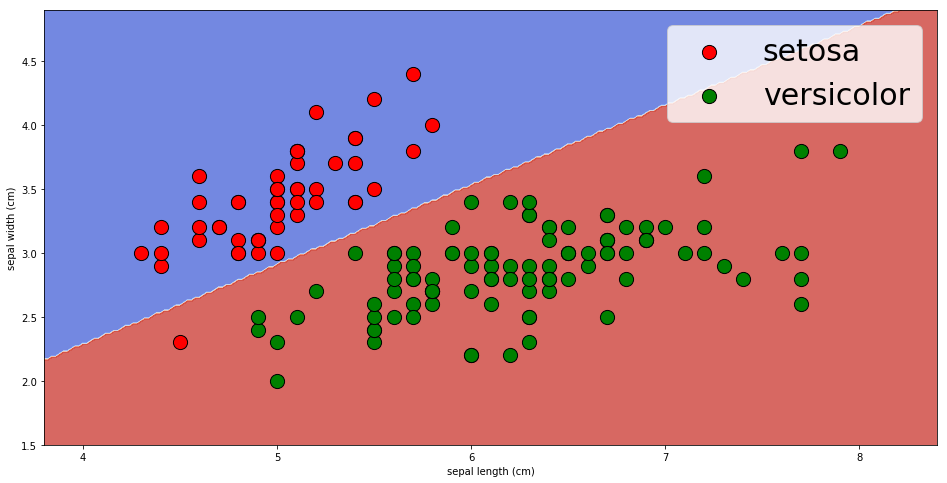

In [40]:
import numpy as np

def make_meshgrid(x, y, h=.02):
    """ Tạo lưới 2 chiều để vẽ 

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy, x_min, x_max, y_min, y_max

def plot_contours(ax, clf, xx, yy, **params):
    """ Vẽ đường các vùng ra quyết định của 1 mô hình phân lớp

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

class Logistics:
    def __init__(self):
        self.w = np.array([0.5,-0.85])
        self.w0 = -0.2
        self.eta = 0.001
        self.T = 10000
        self.lda = 0.001
        
    def predict(self, X):
        f = np.dot(X,self.w) + self.w0
        y = 1*(f>0)
        return y
    
    def fit(self, X, y):
        # dao ham voi mau i
        # Xi ( Yi - P(Y=1|Xi,w ))
        # w -> w + eta * Xi ( Yi - P(Y=1|Xi,w ))
        # w0 -> w0 + eta * ( Yi - P(Y=1|Xi,w ))
        for i in range(self.T):
            f = np.dot(X,self.w) + self.w0
            p = 1.0 / (1.0 + np.exp(-f) )
            l = np.sum( y*p + (1-y)*(1-p) )
            self.w = self.w  \
                + self.eta * np.sum( X * np.reshape(y-p, newshape=(150,1)), axis=0 )  \
                - self.lda * self.w
            self.w0 = self.w0 + self.eta * np.sum(y-p) - self.lda * self.w0
            print ("iter", i, "likelihood", l)
        

# Lấy giá trị min, max của các đặc trưng để vẽ hình
xx, yy, x_min, x_max, y_min, y_max = make_meshgrid(X[:,0], X[:,1])

# Lấy ra hệ tọa độ để vẽ
fig, ax = plt.subplots(figsize=(16, 8))

# Màu sắc của từng lớp đối tượng
color = ['red', 'green', 'blue']

logistics = Logistics()
logistics.fit(X, y);
print( logistics.w, logistics.w0 )
# Vẽ các vùng quyết định của mô hình (sau khi huấn luyện)
plot_contours(ax, logistics, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Vẽ từng lớp trong dữ liệu
for classIndex in set(y):
    # Lọc ra các mẫu thuộc vào lớp classIndex
    mask = y==classIndex
    # Lấy tên của lớp
    name = iris.target_names[classIndex]
    # Vẽ các mẫu thuộc lớp classIndex
    ax.scatter(X[mask,0], X[mask,1], c=color[classIndex], label=name, edgecolor='k', s = 200)

# đặt các thông số của đồ thị
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
#ax.set_xticks(())
#ax.set_yticks(())
ax.legend(fontsize=30)

# Đưa ra màn hình
plt.show()

[ 3.04585631 -2.66855503  2.86740991  0.1797245  -0.33541682] -0.293222801921


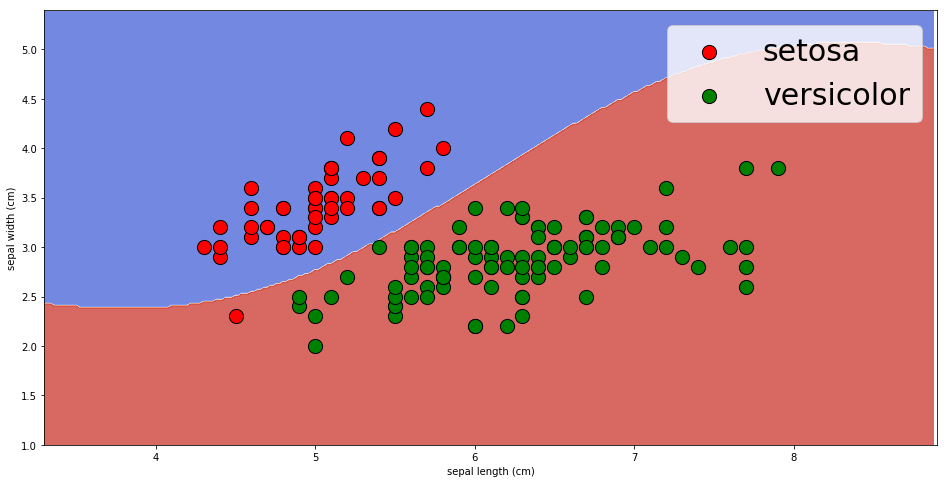

In [61]:
import numpy as np

def make_meshgrid(x, y, h=.02):
    """ Tạo lưới 2 chiều để vẽ 

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy, x_min, x_max, y_min, y_max

def plot_contours(ax, clf, xx, yy, **params):
    """ Vẽ đường các vùng ra quyết định của 1 mô hình phân lớp

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

class Logistics:
    def __init__(self):
        self.w = np.array([0,0,0,0,0])
        self.w0 = 0
        self.eta = 0.001
        self.T = 10000
        self.lda = 0.001
        
    def feature(self, X):
        ft = np.transpose( np.vstack([X[:,0], X[:,1], np.sin(X[:,0]), np.cos(X[:,1]), X[:,0]*X[:,1]]) )
        return ft
    
    def z(self, ft):
        f = np.dot(ft,self.w) + self.w0
        return f
    
    def predict(self, X):
        ft = self.feature(X)
        f = self.z(ft)
        y = 1*(f>0)
        return y
    
    def fit(self, X, y):
        # dao ham voi mau i
        # Xi ( Yi - P(Y=1|Xi,w ))
        # w -> w + eta * Xi ( Yi - P(Y=1|Xi,w ))
        # w0 -> w0 + eta * ( Yi - P(Y=1|Xi,w ))
        for i in range(self.T):
            ft = self.feature(X)
            f = self.z(ft)
            p = 1.0 / (1.0 + np.exp(-f) )
            l = np.sum( y*p + (1-y)*(1-p) )
            self.w = self.w  \
                + self.eta * np.sum( ft * np.reshape(y-p, newshape=(150,1)), axis=0 )  \
                - self.lda * self.w
            self.w0 = self.w0 + self.eta * np.sum(y-p) - self.lda * self.w0
            #print ("iter", i, "likelihood", l)
        

# Lấy giá trị min, max của các đặc trưng để vẽ hình
xx, yy, x_min, x_max, y_min, y_max = make_meshgrid(X[:,0], X[:,1])

# Lấy ra hệ tọa độ để vẽ
fig, ax = plt.subplots(figsize=(16, 8))

# Màu sắc của từng lớp đối tượng
color = ['red', 'green', 'blue']

logistics = Logistics()
logistics.fit(X, y);
print( logistics.w, logistics.w0 )
# Vẽ các vùng quyết định của mô hình (sau khi huấn luyện)
plot_contours(ax, logistics, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Vẽ từng lớp trong dữ liệu
for classIndex in set(y):
    # Lọc ra các mẫu thuộc vào lớp classIndex
    mask = y==classIndex
    # Lấy tên của lớp
    name = iris.target_names[classIndex]
    # Vẽ các mẫu thuộc lớp classIndex
    ax.scatter(X[mask,0], X[mask,1], c=color[classIndex], label=name, edgecolor='k', s = 200)

# đặt các thông số của đồ thị
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
#ax.set_xticks(())
#ax.set_yticks(())
ax.legend(fontsize=30)

# Đưa ra màn hình
plt.show()

In [55]:
np.transpose( np.vstack([X[:,0], X[:,1], X[:,0]*X[:,0], X[:,1]*X[:,1], X[:,0]*X[:,1]]) )

array([[  5.1 ,   3.5 ,  26.01,  12.25,  17.85],
       [  4.9 ,   3.  ,  24.01,   9.  ,  14.7 ],
       [  4.7 ,   3.2 ,  22.09,  10.24,  15.04],
       [  4.6 ,   3.1 ,  21.16,   9.61,  14.26],
       [  5.  ,   3.6 ,  25.  ,  12.96,  18.  ],
       [  5.4 ,   3.9 ,  29.16,  15.21,  21.06],
       [  4.6 ,   3.4 ,  21.16,  11.56,  15.64],
       [  5.  ,   3.4 ,  25.  ,  11.56,  17.  ],
       [  4.4 ,   2.9 ,  19.36,   8.41,  12.76],
       [  4.9 ,   3.1 ,  24.01,   9.61,  15.19],
       [  5.4 ,   3.7 ,  29.16,  13.69,  19.98],
       [  4.8 ,   3.4 ,  23.04,  11.56,  16.32],
       [  4.8 ,   3.  ,  23.04,   9.  ,  14.4 ],
       [  4.3 ,   3.  ,  18.49,   9.  ,  12.9 ],
       [  5.8 ,   4.  ,  33.64,  16.  ,  23.2 ],
       [  5.7 ,   4.4 ,  32.49,  19.36,  25.08],
       [  5.4 ,   3.9 ,  29.16,  15.21,  21.06],
       [  5.1 ,   3.5 ,  26.01,  12.25,  17.85],
       [  5.7 ,   3.8 ,  32.49,  14.44,  21.66],
       [  5.1 ,   3.8 ,  26.01,  14.44,  19.38],
       [  5.4 ,   3.